In [168]:
from io import IncrementalNewlineDecoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.model_selection import learning_curve
from sklearn import metrics

In [169]:
warnings.filterwarnings('ignore')

In [170]:
data = pd.read_csv("data/phishing.csv")
data.head(5)

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [171]:
data.shape


(11054, 32)

In [172]:
data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

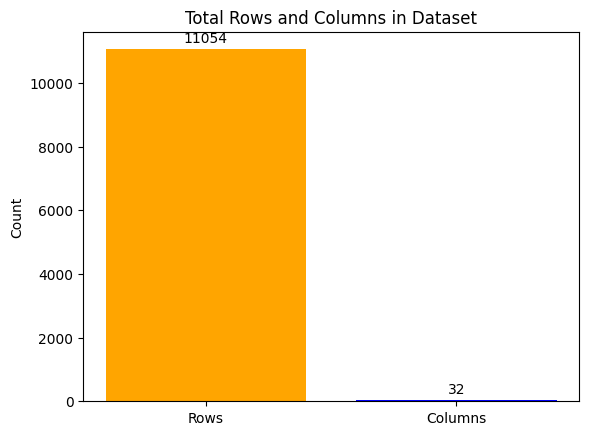

In [173]:
# Count total rows and columns
rows, columns = data.shape

# Data for the chart
counts = {'Rows': rows, 'Columns': columns}

# Create the bar chart
fig, ax = plt.subplots()
bars = ax.bar(counts.keys(), counts.values(), color=['orange', 'blue'])

# Add labels and title
ax.set_ylabel('Count')
ax.set_title('Total Rows and Columns in Dataset')

# Adding the text labels on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Show the chart
plt.show()

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [175]:
# Checking number of unique values in dataset
data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

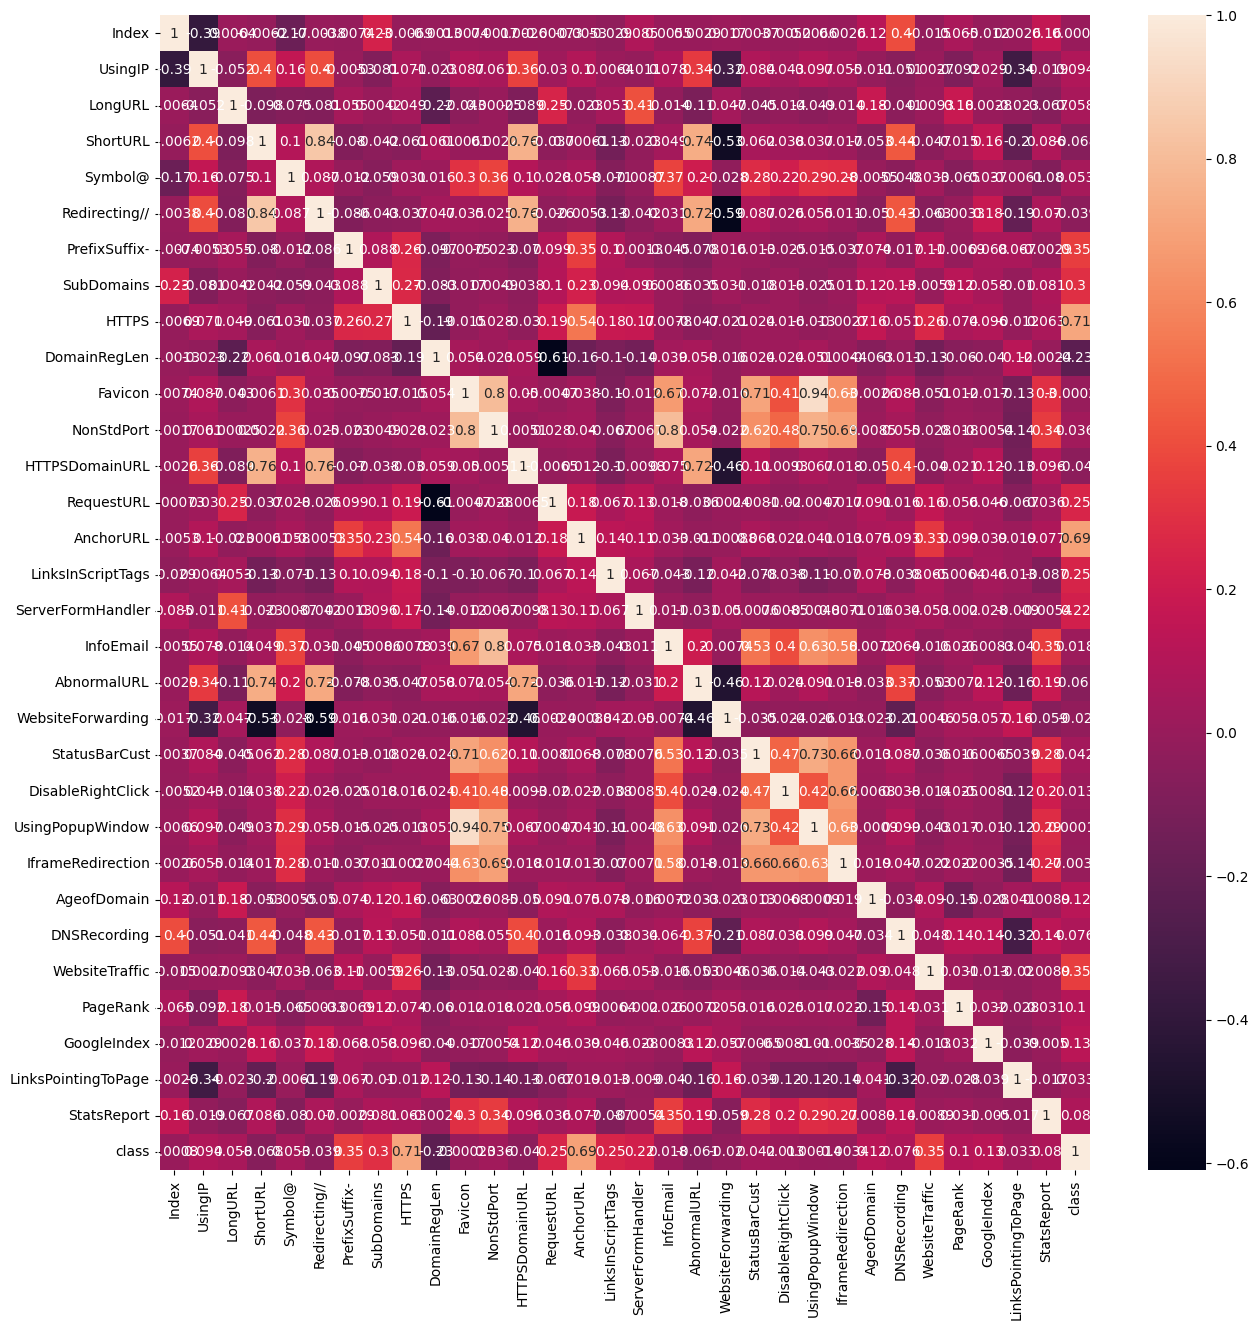

In [176]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [177]:
#data = data.drop(['Index'], axis=1)

In [178]:
# Getting decription of dataset
data.describe()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
count,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,...,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000
mean,5526.500000,0.313914,-0.633345,0.738737,0.700561,0.741632,-0.734938,0.064049,0.251040,-0.336711,...,0.613353,0.816899,0.061335,0.377239,0.287407,-0.483626,0.721549,0.343948,0.719739,0.113986
std,3191.159272,0.949495,0.765973,0.674024,0.713625,0.670837,0.678165,0.817492,0.911856,0.941651,...,0.789845,0.576807,0.998162,0.926158,0.827680,0.875314,0.692395,0.569936,0.694276,0.993527
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2763.250000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5526.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8289.750000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11053.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


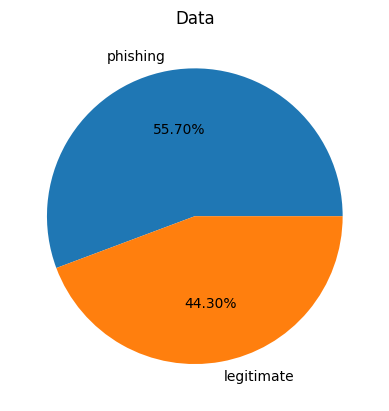

In [179]:
# Count in a pie chart
data_counts = data['class'].value_counts()

# Map labels to numerical values
label_map = {-1: 'phishing', 1: 'legitimate'}
data_counts = data_counts.rename(label_map)

plt.pie(data_counts, labels=label_map.values(), autopct='%1.2f%%')
plt.title("Data")
plt.show()

In [180]:
# X = data.drop(["class"], axis=1)
# y = data["class"]

X = data.drop(columns=['Index', 'class'])
y = data['class']

In [181]:
from sklearn.model_selection import train_test_split

# Initial split: 70% train+validation, 30% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Secondary split: 70% train, 30% validation from the train+validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42, stratify=y_train_val)

# Print the shapes of the resulting datasets
print(f'Training set: {X_train.shape}')
print(f'Validation set: {X_val.shape}')
print(f'Test set: {X_test.shape}')
print(f'Training labels: {y_train.shape}')
print(f'Validation labels: {y_val.shape}')
print(f'Test labels: {y_test.shape}')


Training set: (5415, 30)
Validation set: (2322, 30)
Test set: (3317, 30)
Training labels: (5415,)
Validation labels: (2322,)
Test labels: (3317,)


In [188]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [183]:
# X_train.shape, X_test.shape,y_train.shape, y_test.shape

In [184]:
# Let us create containers to hold our model accuracy
ML_Model = []
accuracy = []
metrics_dict = {'Model': [], 'R2': [], 'MAE': [], 'MSE': [], 'RMSE': []}

# Function to store results
def storeResults(model, acc, r2, mae, mse, rmse):
    ML_Model.append(model)
    accuracy.append(round(acc, 3))
    metrics_dict['Model'].append(model)
    metrics_dict['R2'].append(r2)
    metrics_dict['MAE'].append(mae)
    metrics_dict['MSE'].append(mse)
    metrics_dict['RMSE'].append(rmse)

In [185]:
# Function to calculate and return evaluation metrics
def calculateMetrics(y_true, y_pred):
    r2   = metrics.r2_score(y_true, y_pred)
    mae  = metrics.mean_absolute_error(y_true, y_pred)
    mse  = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return r2, mae, mse, rmse

def printMetrics(y_true, y_pred):
    r2 = metrics.r2_score(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"R squared error : {r2}")
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean squared error : {mse}")
    print(f"Root Mean squared error : {rmse}")

In [186]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [187]:

y_train_forest      = forest.predict(X_train)
y_test_forest       = forest.predict(X_val)
acc_train_forest    = metrics.accuracy_score(y_train, y_train_forest)
acc_test_forest     = metrics.accuracy_score(y_test, y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))

ValueError: Found input variables with inconsistent numbers of samples: [3317, 2322]

In [ ]:
print(metrics.classification_report(y_test, y_test_forest))
printMetrics(y_test, y_test_forest)
r2, mae, mse, rmse = calculateMetrics(y_test, y_test_forest)
storeResults('Random Forest', acc_test_forest, r2, mae, mse, rmse)

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211

R squared error : 0.873432833344395
Mean Absolute Error : 0.06241519674355495
Mean squared error : 0.1248303934871099
Root Mean squared error : 0.3533134493436528


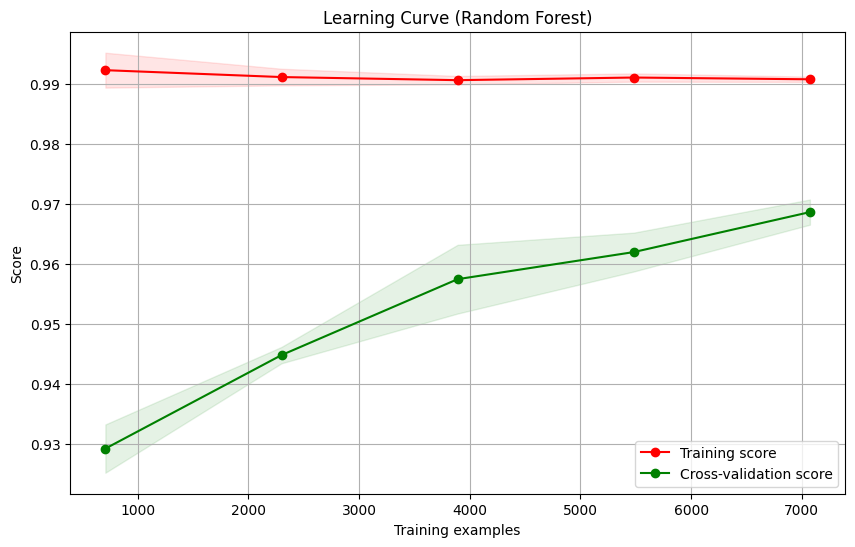

In [ ]:
plot_learning_curve(forest, "Learning Curve (Random Forest)", X_train, y_train, cv=5)
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}
svc = GridSearchCV(SVC(), param_grid)
svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [ ]:
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))


Support Vector Machine : Accuracy on training Data: 0.969
Support Vector Machine : Accuracy on test Data: 0.964


In [ ]:
print(metrics.classification_report(y_test, y_test_svc))
printMetrics(y_test, y_test_svc)
r2, mae, mse, rmse = calculateMetrics(y_test, y_test_svc)
storeResults('Support Vector Classifier', acc_test_svc, r2, mae, mse, rmse)

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211

R squared error : 0.855089765713148
Mean Absolute Error : 0.07146087743102668
Mean squared error : 0.14292175486205336
Root Mean squared error : 0.3780499369951718


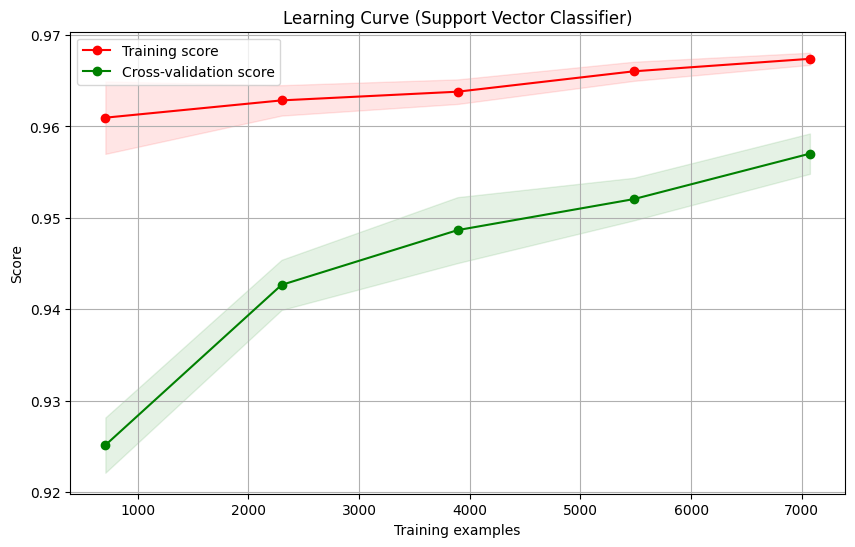

In [ ]:
plot_learning_curve(svc.best_estimator_, "Learning Curve (Support Vector Classifier)", X_train, y_train, cv=5)
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(max_depth=4, learning_rate=0.7)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [ ]:
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.989
Gradient Boosting Classifier : Accuracy on test Data: 0.974


In [ ]:
print(metrics.classification_report(y_test, y_test_gbc))
printMetrics(y_test, y_test_gbc)
r2, mae, mse, rmse = calculateMetrics(y_test, y_test_gbc)
storeResults('Gradient Boosting Classifier', acc_test_gbc, r2, mae, mse, rmse)


              precision    recall  f1-score   support

          -1       0.99      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211

R squared error : 0.8954445145018916
Mean Absolute Error : 0.051560379918588875
Mean squared error : 0.10312075983717775
Root Mean squared error : 0.32112421247420403


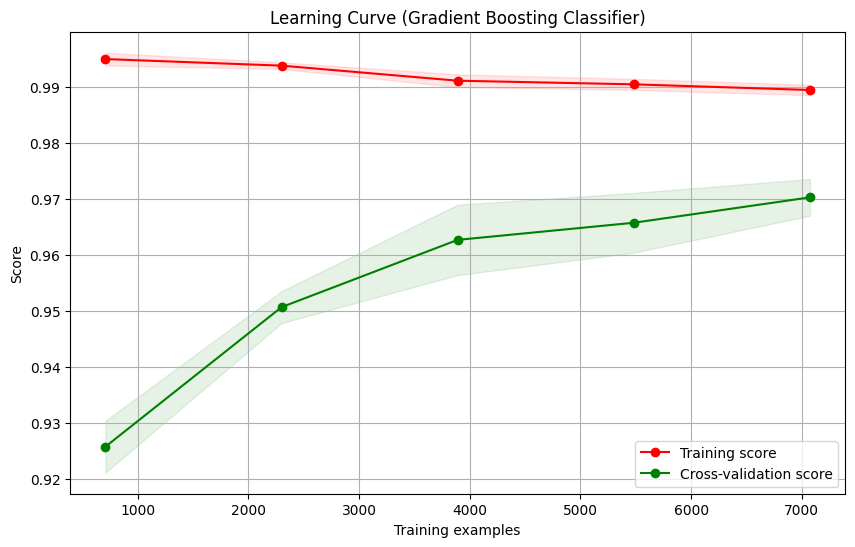

In [ ]:
plot_learning_curve(gbc, "Learning Curve (Gradient Boosting Classifier)", X_train, y_train, cv=5)
plt.show()

In [ ]:
result = pd.DataFrame({ 'ML_Model': ML_Model,
                       'Accuracy': accuracy,})
sorted_result=result.sort_values(by=['Accuracy'],ascending=False).reset_index(drop=True)
sorted_result


,ML_Model,Accuracy
0,Gradient Boosting Classifier,0.974
1,Random Forest,0.969
2,Support Vector Classifier,0.964


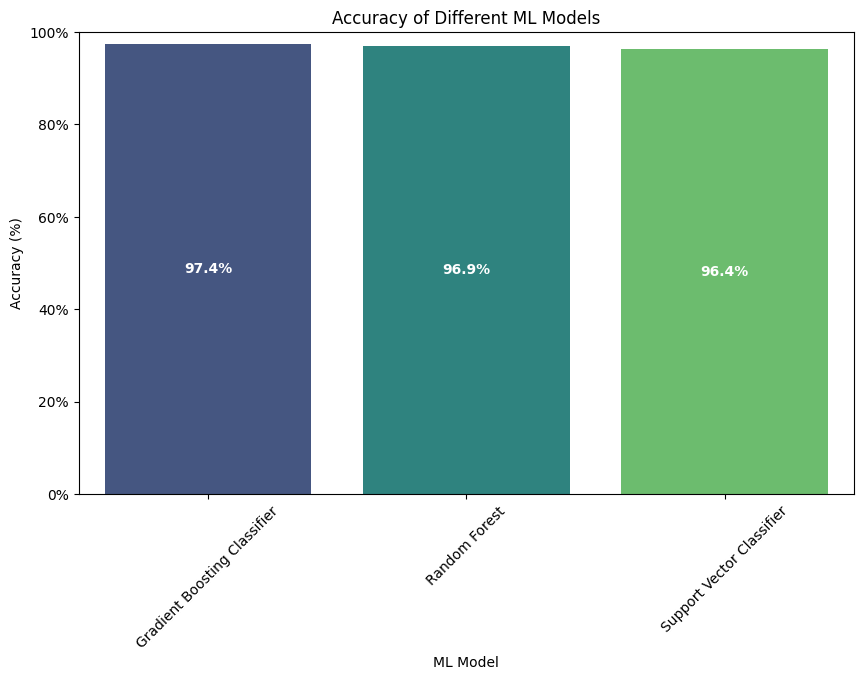

In [ ]:
# Sort the results by accuracy
sorted_result = result.sort_values(by=['Accuracy'], ascending=False).reset_index(drop=True)

# Convert accuracy to percentage
sorted_result['Accuracy'] = sorted_result['Accuracy'] * 100

# Plot the bar chart for accuracy as percentage
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='ML_Model', y='Accuracy', data=sorted_result, palette='viridis')

# Set title and labels
plt.title('Accuracy of Different ML Models')
plt.xlabel('ML Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)

# Format y-axis to show percentage
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))

# Annotate each bar with the percentage value in the middle of the bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height / 2), 
                ha='center', va='center', 
                color='white', weight='bold')

plt.show()

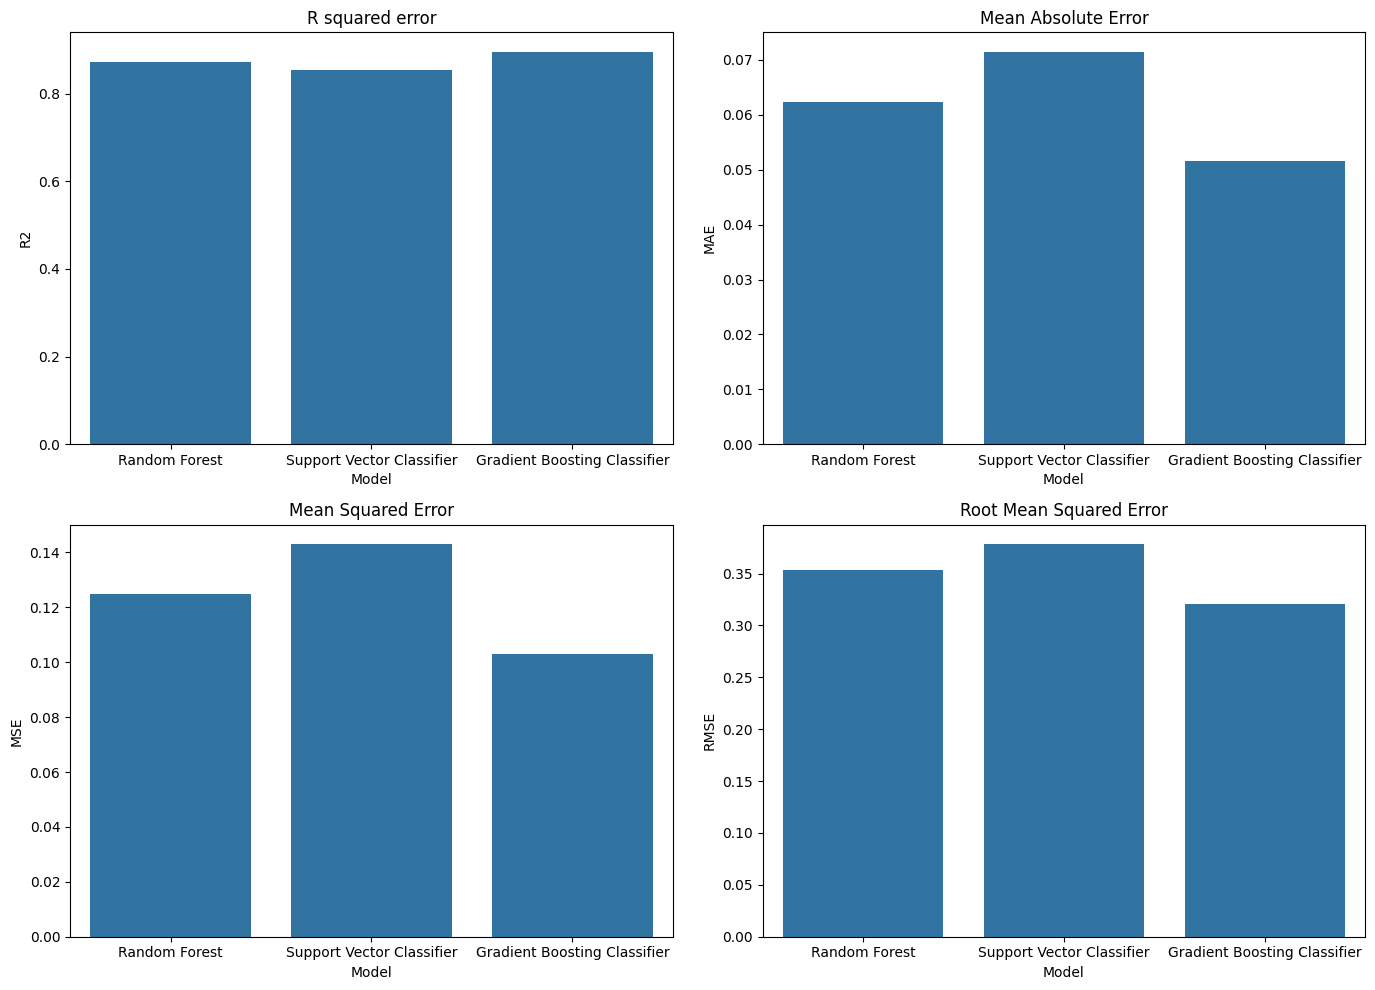

In [ ]:
# Create DataFrame for the results
metrics_df = pd.DataFrame(metrics_dict)

# Plotting the metrics
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# R squared error
sns.barplot(x='Model', y='R2', data=metrics_df, ax=axs[0, 0])
axs[0, 0].set_title('R squared error')

# Mean Absolute Error
sns.barplot(x='Model', y='MAE', data=metrics_df, ax=axs[0, 1])
axs[0, 1].set_title('Mean Absolute Error')

# Mean Squared Error
sns.barplot(x='Model', y='MSE', data=metrics_df, ax=axs[1, 0])
axs[1, 0].set_title('Mean Squared Error')

# Root Mean Squared Error
sns.barplot(x='Model', y='RMSE', data=metrics_df, ax=axs[1, 1])
axs[1, 1].set_title('Root Mean Squared Error')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()

# Fit the model to your data
gb_clf.fit(X_train, y_train)

# Predict probabilities
probabilities = gb_clf.predict_proba(X_test)

# Get the log loss
from sklearn.metrics import log_loss
loss = log_loss(y_test, probabilities)

print(f'Log Loss: {loss}')

Log Loss: 0.12966299320822075


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(max_depth=4, learning_rate=0.7)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [ ]:
import pickle

# dump information to that file
pickle.dump(gbc, open('model.pkl', 'wb'))

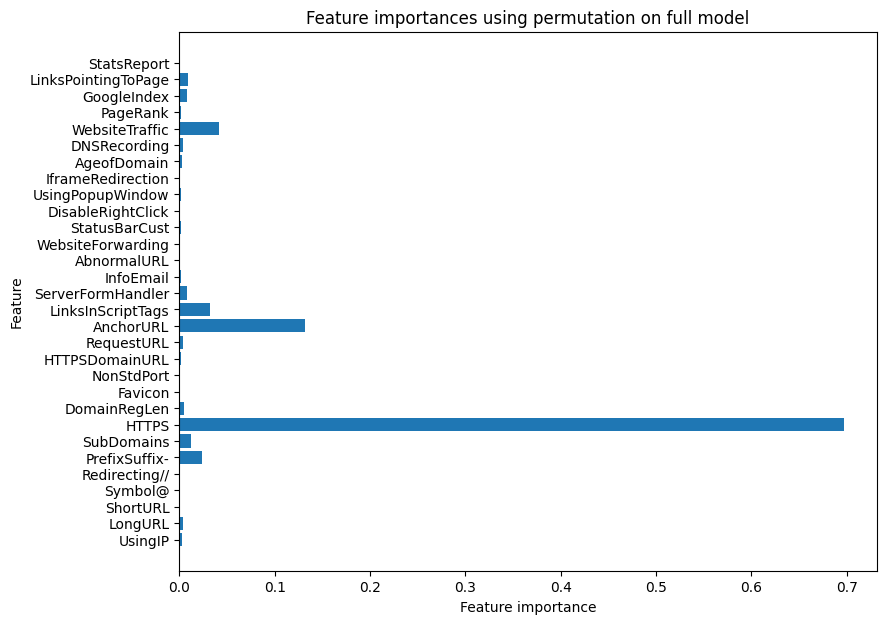

In [ ]:
# Feature importances in GBC on X_train
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

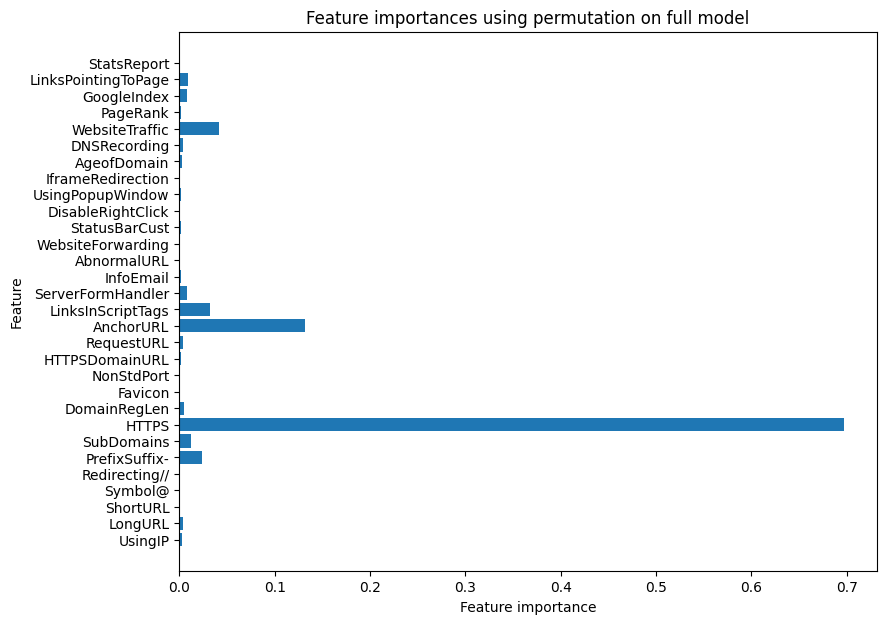

In [ ]:
# Feature importances in GBC on X_test
plt.figure(figsize=(9,7))
n_features = X_test.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_test.columns)
plt.title("Feature importances in GBC")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

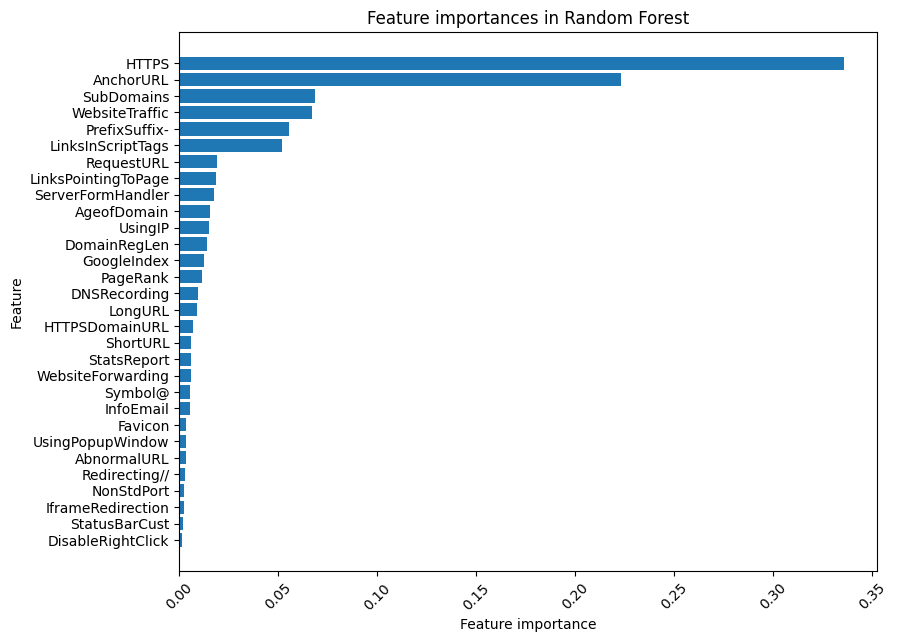

In [ ]:
# Get feature importances
feature_importances = forest.feature_importances_

# Feature names (assuming you have them stored)
feature_names = X_test.columns  # Assuming feature names are in X_test.columns

# Sort feature importances and names together by importance
sorted_idx = feature_importances.argsort()
feature_names = feature_names[sorted_idx]
feature_importances = feature_importances[sorted_idx]

# Create the figure
plt.figure(figsize=(9, 7))

# Create a bar chart
plt.barh(range(len(feature_names)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Feature importances in Random Forest")
plt.xticks(rotation=45)

# Show the plot
plt.show()

Classification Report:
               precision    recall  f1-score   support

          -1       0.96      0.94      0.95       976
           1       0.95      0.97      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



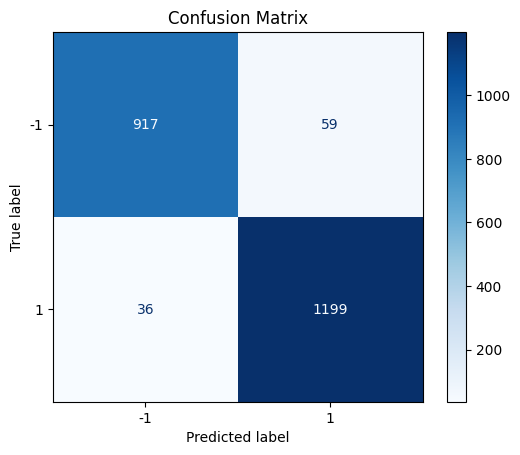

In [ ]:
#Bonus 1 GBC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the model with key parameters
gbc = GradientBoostingClassifier(max_depth=4, learning_rate=0.1, n_estimators=100, random_state=42)

# Train the model
gbc.fit(X_train, y_train)

# Predict using the trained model
y_pred = gbc.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=gbc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.96      0.96       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



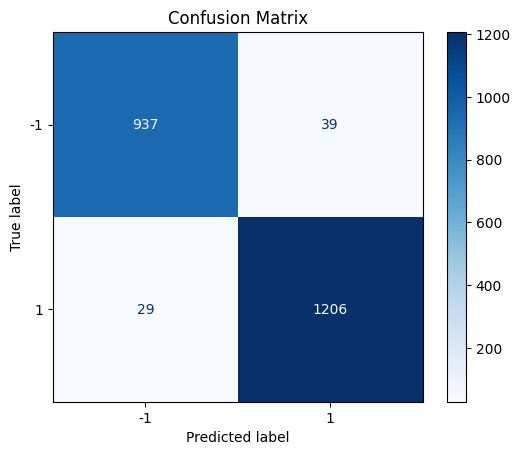

In [ ]:
# Bonus 1 for RF

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the model with key parameters
forest = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Train the model
forest.fit(X_train, y_train)

# Predict using the trained model
y_pred = forest.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=forest.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


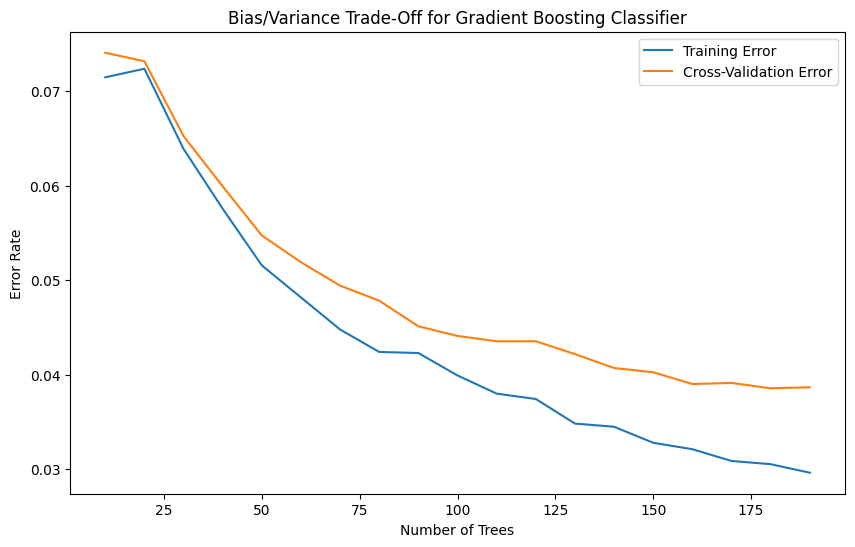

In [ ]:
# Bonus 2 GBC

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Define the range of model complexities (number of trees)
n_estimators_range = range(10, 200, 10)
train_errors = []
cv_errors = []

# Loop over different model complexities
for n_estimators in n_estimators_range:
    # Initialize GBC with varying number of trees
    gbc = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=4, learning_rate=0.1, random_state=42)
    
    # Fit the model to the training data
    gbc.fit(X_train, y_train)
    
    # Calculate training error
    train_error = 1 - gbc.score(X_train, y_train)
    train_errors.append(train_error)
    
    # Calculate cross-validation error
    cv_error = 1 - np.mean(cross_val_score(gbc, X_train, y_train, cv=5))
    cv_errors.append(cv_error)

# Plotting the training and cross-validation errors
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_errors, label='Training Error')
plt.plot(n_estimators_range, cv_errors, label='Cross-Validation Error')
plt.xlabel('Number of Trees')
plt.ylabel('Error Rate')
plt.title('Bias/Variance Trade-Off for Gradient Boosting Classifier')
plt.legend()
plt.show()


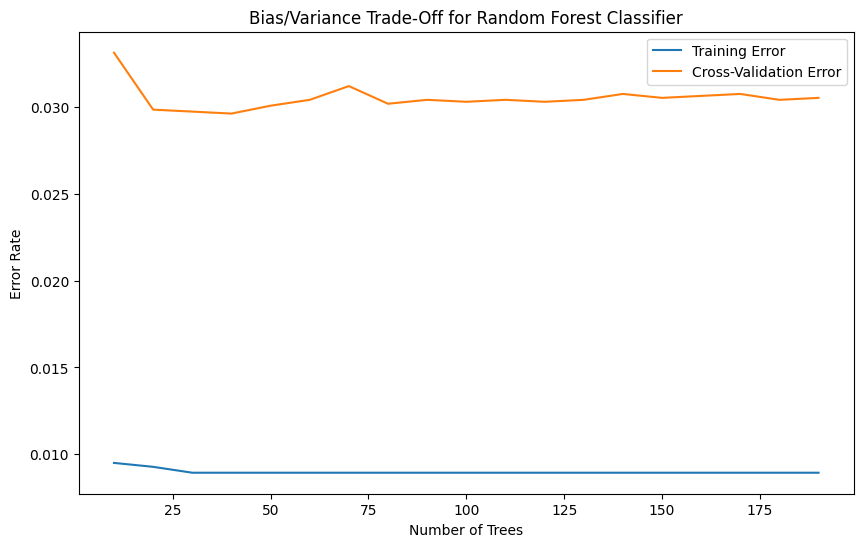

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Define the range of model complexities (number of trees)
n_estimators_range = range(10, 200, 10)
train_errors = []
cv_errors = []

# Loop over different model complexities
for n_estimators in n_estimators_range:
    # Initialize Random Forest with varying number of trees
    forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=None, random_state=42)
    
    # Fit the model to the training data
    forest.fit(X_train, y_train)
    
    # Calculate training error
    train_error = 1 - forest.score(X_train, y_train)
    train_errors.append(train_error)
    
    # Calculate cross-validation error
    cv_error = 1 - np.mean(cross_val_score(forest, X_train, y_train, cv=5))
    cv_errors.append(cv_error)

# Plotting the training and cross-validation errors
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_errors, label='Training Error')
plt.plot(n_estimators_range, cv_errors, label='Cross-Validation Error')
plt.xlabel('Number of Trees')
plt.ylabel('Error Rate')
plt.title('Bias/Variance Trade-Off for Random Forest Classifier')
plt.legend()
plt.show()
